### Importing Libraries

In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

### Loading Dataset

In [151]:
df = pd.read_csv("student_performance_large_dataset.csv")
df.head()

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C


### Exploring Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Student_ID                               10000 non-null  object
 1   Age                                      10000 non-null  int64 
 2   Gender                                   10000 non-null  object
 3   Study_Hours_per_Week                     10000 non-null  int64 
 4   Preferred_Learning_Style                 10000 non-null  object
 5   Online_Courses_Completed                 10000 non-null  int64 
 6   Participation_in_Discussions             10000 non-null  object
 7   Assignment_Completion_Rate (%)           10000 non-null  int64 
 8   Exam_Score (%)                           10000 non-null  int64 
 9   Attendance_Rate (%)                      10000 non-null  int64 
 10  Use_of_Educational_Tech                  10000 non-null  ob

In [9]:
df.isnull().sum()

Student_ID                                 0
Age                                        0
Gender                                     0
Study_Hours_per_Week                       0
Preferred_Learning_Style                   0
Online_Courses_Completed                   0
Participation_in_Discussions               0
Assignment_Completion_Rate (%)             0
Exam_Score (%)                             0
Attendance_Rate (%)                        0
Use_of_Educational_Tech                    0
Self_Reported_Stress_Level                 0
Time_Spent_on_Social_Media (hours/week)    0
Sleep_Hours_per_Night                      0
Final_Grade                                0
dtype: int64

In [154]:
df["Gender"].value_counts()

Gender
Female    4846
Male      4748
Other      406
Name: count, dtype: int64

### EDA

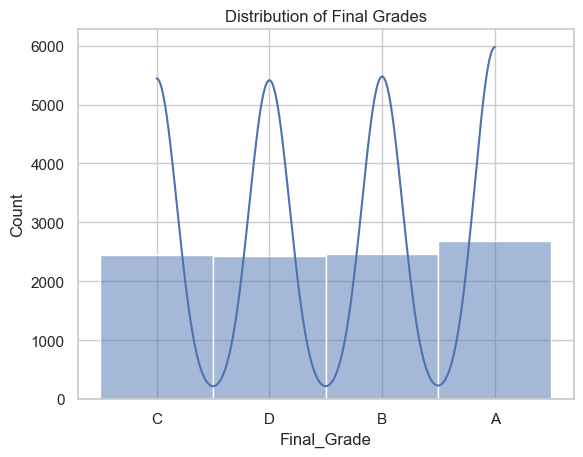

In [23]:
sns.histplot(df["Final_Grade"],bins=20,kde=True)
plt.title("Distribution of Final Grades")
plt.show()

<Figure size 1200x800 with 0 Axes>

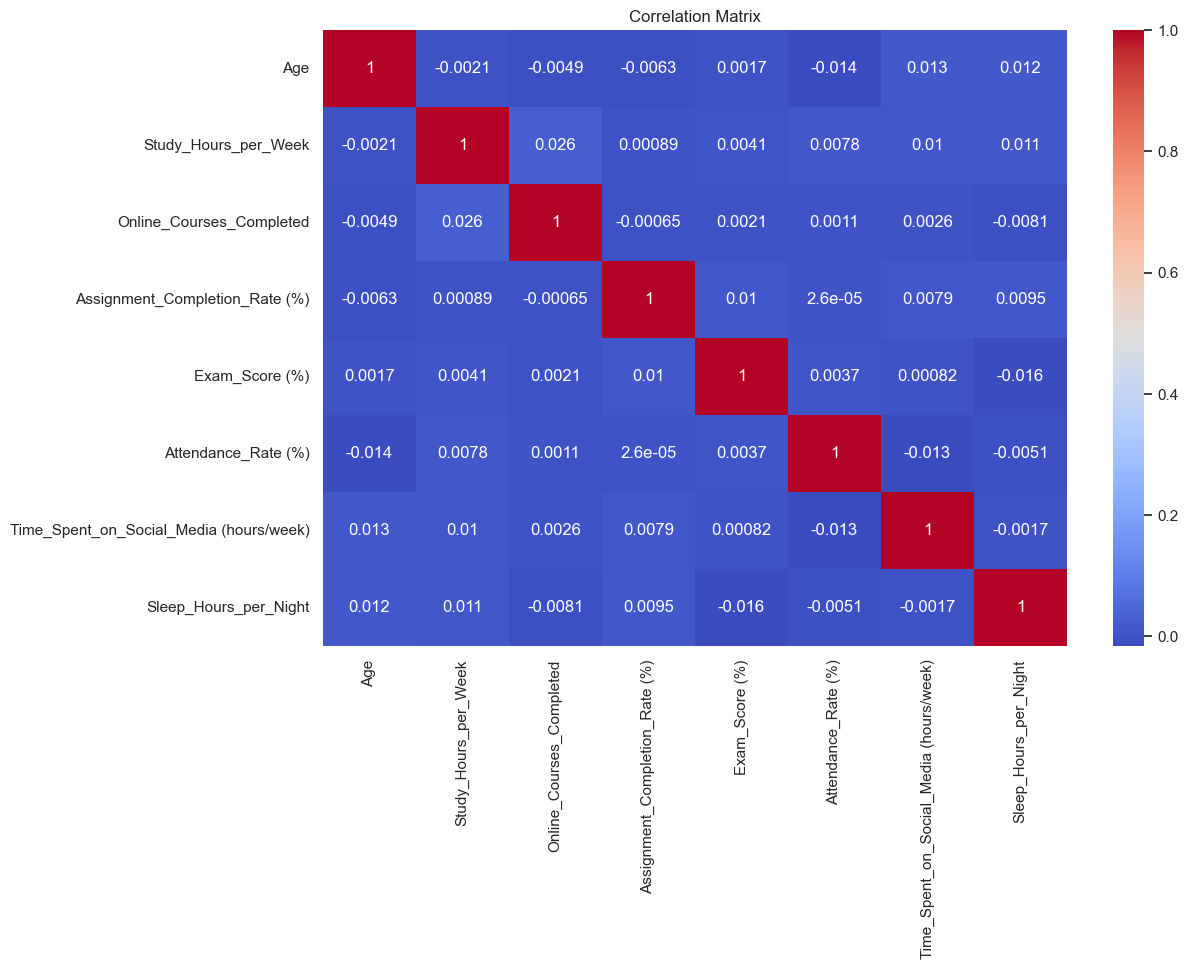

In [33]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

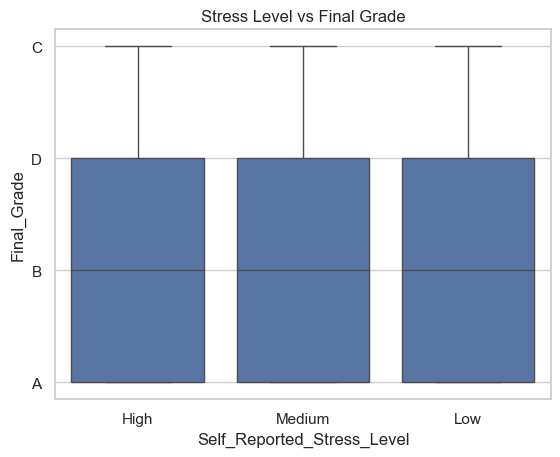

In [35]:
sns.boxplot(data=df, x='Self_Reported_Stress_Level', y='Final_Grade')
plt.title("Stress Level vs Final Grade")
plt.show()

### Preprocessing

In [77]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])
df['Preferred_Learning_Style'] = le.fit_transform(df['Preferred_Learning_Style'])
df['Use_of_Educational_Tech'] = le.fit_transform(df['Use_of_Educational_Tech'])
df['Participation_in_Discussions'] = le.fit_transform(df['Participation_in_Discussions'])
df['Self_Reported_Stress_Level'] = le.fit_transform(df['Self_Reported_Stress_Level'])

In [79]:
X=df.drop(["Student_ID","Final_Grade"],axis=1)
y=df["Final_Grade"]

In [83]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

### Model Building

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [111]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [121]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

### Final prediction & conclusion

In [129]:
from sklearn.metrics import classification_report,accuracy_score
# Predict on test data
y_pred = model.predict(X_test_scaled)
acc=accuracy_score(y_test, y_pred)

# Accuracy
print("Accuracy Score:", acc)
print(f"Accuracy = {acc*100}%")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy Score: 1.0
Accuracy = 100.0%

Classification Report:
               precision    recall  f1-score   support

           A       1.00      1.00      1.00       796
           B       1.00      1.00      1.00       734
           C       1.00      1.00      1.00       746
           D       1.00      1.00      1.00       724

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



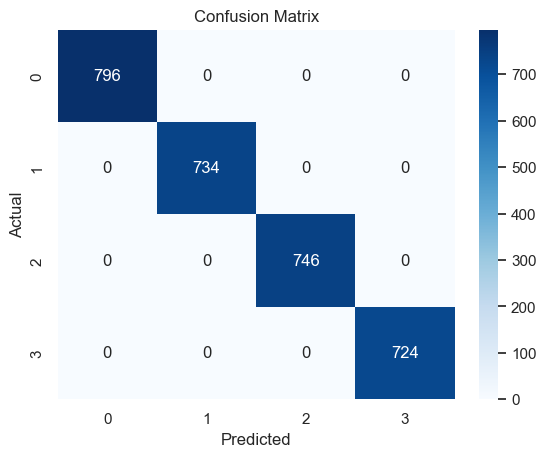

In [133]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()